# Web Scrapping from Cars24.com to Extract Features of Different Cities

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np


urls = {
    'Hyderabad': 'https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header',
    'Delhi': 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001',
    'Mumbai': 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001',
    'Bangalore': 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001',
    'Chennai': 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001'
}

main_div = '_2ujGx'
sub_div = '_2YB7p'
subsub_div = {
    'name':'_11dVb',
    'price':'_3RL-I',
    'emi':'_2O0yU',
    'details_list':'_3J2G-',
    'features':'_3JoYA'
}


name, price, emi, distance, fuel_type, transmission, features, city = [], [], [], [], [], [], [], []


def scrape_city(city_name, url):
    print(f"Scraping data for {city_name}...")


    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')


    print(f"Page source length for {city_name}: {len(response.text)}")


    for x in soup.find_all('div', {'class': main_div}):
        for i in x.find_all('div', {'class': sub_div}):
            try:
                car_name = i.find('h3', {'class': subsub_div['name']}).text
                name.append(car_name)
            except Exception as e:
                print(f"Error extracting name: {e}")
                name.append(np.nan)
            try:
                car_price = i.find('strong', {'class': subsub_div['price']}).text
                price.append(car_price)
            except Exception as e:
                print(f"Error extracting price: {e}")
                price.append(np.nan)
            try:
                car_emi = i.find('span', {'class': subsub_div['emi']}).text
                emi.append(car_emi)
            except Exception as e:
                print(f"Error extracting EMI: {e}")
                emi.append(np.nan)
            try:

                details_list = i.find('ul', {'class': subsub_div['details_list']})
                car_distance = details_list.find_all('li')[0].text
                car_fuel_type = details_list.find_all('li')[2].text
                car_transmission = details_list.find_all('li')[4].text
                distance.append(car_distance)
                fuel_type.append(car_fuel_type)
                transmission.append(car_transmission)
            except Exception as e:
                print(f"Error extracting distance, fuel type, or transmission: {e}")
                distance.append(np.nan)
                fuel_type.append(np.nan)
                transmission.append(np.nan)
            try:
                car_features = i.find('span', {'class': subsub_div['features']}).text
                features.append(car_features)
            except Exception as e:
                print(f"Error extracting city driven info: {e}")
                features.append(np.nan)
            city.append(city_name)


    print(f"Names extracted for {city_name}: {name[-5:]}")
    print(f"Prices extracted for {city_name}: {price[-5:]}")
    print(f"EMIs extracted for {city_name}: {emi[-5:]}")
    print(f"Distances extracted for {city_name}: {distance[-5:]}")
    print(f"Fuel Types extracted for {city_name}: {fuel_type[-5:]}")
    print(f"Transmissions extracted for {city_name}: {transmission[-5:]}")
    print(f"Features info extracted for {city_name}: {features[-5:]}")
    print(f"City data extracted for {city_name}: {city[-5:]}")


for city_name, url in urls.items():
    scrape_city(city_name, url)

df = pd.DataFrame({
    "Car Name": name,
    'Price': price,
    "EMI": emi,
    "Distance Driven": distance,
    "Fuel Type": fuel_type,
    "Transmission": transmission,
    "Features": features,
    "Location": city
})

print(f"DataFrame shape: {df.shape}")
print(df.head())

df.to_csv("Cars24.csv", index=False)


Scraping data for Hyderabad...
Page source length for Hyderabad: 944341
Names extracted for Hyderabad: ['2021 Nissan MAGNITE XL TURBO', '2022 Maruti New Wagon-R VXI 1.0', '2019 Maruti Baleno DELTA PETROL 1.2', '2018 Hyundai Elite i20 ASTA 1.2  CVT', '2014 Maruti Swift Dzire ZDI']
Prices extracted for Hyderabad: ['₹6.93 Lakh', '₹5.78 Lakh', '₹6.38 Lakh', '₹7.05 Lakh', '₹5.27 Lakh']
EMIs extracted for Hyderabad: ['EMIs from ₹13,548/month', 'EMIs from ₹11,300/month', 'EMIs from ₹12,478/month', 'EMIs from ₹13,783/month', 'EMIs from ₹13,873/month']
Distances extracted for Hyderabad: ['33,387 km', '44,382 km', '25,443 km', '47,030 km', '98,752 km']
Fuel Types extracted for Hyderabad: ['Petrol', 'Petrol', 'Petrol', 'Petrol', 'Diesel']
Transmissions extracted for Hyderabad: ['Manual', 'Manual', 'Manual', 'Automatic', 'Manual']
Features info extracted for Hyderabad: ['Reg. serviced', 'Top Model', 'Spl. reg. no.', 'Spl. reg. no.', 'Top Model']
City data extracted for Hyderabad: ['Hyderabad', 'Hy

# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np


df = pd.read_csv("Cars24.csv")

In [ ]:
df.head()

,Car Name,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location
0,2022 Maruti Ertiga ZXI+ SHVS,₹10.83 Lakh,"EMIs from ₹20,614/month","28,892 km",Petrol,Manual,Top Model,Hyderabad
1,2016 Hyundai i10 SPORTZ 1.1,₹3.85 Lakh,"EMIs from ₹7,521/month","45,505 km",Petrol,Manual,City driven,Hyderabad
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,₹9.58 Lakh,"EMIs from ₹18,226/month","47,231 km",Petrol,Manual,Top Model,Hyderabad
3,2022 Maruti Baleno ZETA PETROL 1.2,₹7.76 Lakh,"EMIs from ₹15,172/month","33,086 km",Petrol,Manual,As good as new,Hyderabad
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,₹7.57 Lakh,"EMIs from ₹14,794/month","88,132 km",Petrol,Automatic,Alloy wheels,Hyderabad


In [ ]:
regex = r'^\d+\s(\w+)\s'
df['Car Brand'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

In [ ]:
regex = r'^\d+\s\w+\s(.*?)\s\w+$'
df['Model'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))

In [ ]:
df.head()

,Car Name,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Car Brand,Model
0,2022 Maruti Ertiga ZXI+ SHVS,₹10.83 Lakh,"EMIs from ₹20,614/month","28,892 km",Petrol,Manual,Top Model,Hyderabad,Maruti,[Ertiga ZXI+]
1,2016 Hyundai i10 SPORTZ 1.1,₹3.85 Lakh,"EMIs from ₹7,521/month","45,505 km",Petrol,Manual,City driven,Hyderabad,Hyundai,[]
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,₹9.58 Lakh,"EMIs from ₹18,226/month","47,231 km",Petrol,Manual,Top Model,Hyderabad,Hyundai,[Creta SX PLUS 1.6]
3,2022 Maruti Baleno ZETA PETROL 1.2,₹7.76 Lakh,"EMIs from ₹15,172/month","33,086 km",Petrol,Manual,As good as new,Hyderabad,Maruti,[]
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,₹7.57 Lakh,"EMIs from ₹14,794/month","88,132 km",Petrol,Automatic,Alloy wheels,Hyderabad,Maruti,[Ciaz ZETA 1.4 AT]


In [ ]:
def convert_price(price):
    match = re.match(r'₹([\d.]+) Lakh', price)
    if match:
        return float(match.group(1)) * 100000
    return None

def convert_emi(emi):
    match = re.match(r'EMIs from ₹([\d,]+)/month', emi)
    if match:
        return int(match.group(1).replace(',', ''))
    return None


def convert_distance(distance):
    match = re.match(r'([\d,]+) km', distance)
    if match:
        return int(match.group(1).replace(',', ''))
    return None

df['Price'] = df['Price'].apply(convert_price)
df['EMI'] = df['EMI'].apply(convert_emi)
df['Distance Driven'] = df['Distance Driven'].apply(convert_distance)

print(df)

                                  Car Name      Price    EMI  Distance Driven  \
0             2022 Maruti Ertiga ZXI+ SHVS  1083000.0  20614            28892   
1              2016 Hyundai i10 SPORTZ 1.1   385000.0   7521            45505   
2    2017 Hyundai Creta SX PLUS 1.6 PETROL   958000.0  18226            47231   
3       2022 Maruti Baleno ZETA PETROL 1.2   776000.0  15172            33086   
4     2018 Maruti Ciaz ZETA 1.4  AT PETROL   757000.0  14794            88132   
..                                     ...        ...    ...              ...   
95    2015 Hyundai Creta SX (O) 1.6 DIESEL   779000.0  17327            96275   
96           2021 Renault Kwid RXT 1.0 (O)   431000.0   8429            28502   
97      2019 Honda Amaze 1.2L I-VTEC S CVT   643000.0  12564            69080   
98                    2019 Maruti Alto LXI   332000.0   6483            35479   
99  2022 Mahindra Thar LX PETROL HT 4WD AT  1496000.0  28475             5285   

   Fuel Type Transmission  

In [ ]:
df.head()

,Car Name,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Car Brand,Model
0,2022 Maruti Ertiga ZXI+ SHVS,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,Maruti,[Ertiga ZXI+]
1,2016 Hyundai i10 SPORTZ 1.1,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,Hyundai,[]
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,Hyundai,[Creta SX PLUS 1.6]
3,2022 Maruti Baleno ZETA PETROL 1.2,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,Maruti,[]
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,Maruti,[Ciaz ZETA 1.4 AT]


In [ ]:
regex = r'^\d+'
df['Model Year'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

In [ ]:
df.head()

,Car Name,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Car Brand,Model,Model Year
0,2022 Maruti Ertiga ZXI+ SHVS,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,Maruti,[Ertiga ZXI+],2022
1,2016 Hyundai i10 SPORTZ 1.1,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,Hyundai,[],2016
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,Hyundai,[Creta SX PLUS 1.6],2017
3,2022 Maruti Baleno ZETA PETROL 1.2,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,Maruti,[],2022
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,Maruti,[Ciaz ZETA 1.4 AT],2018


In [ ]:
regex = r'\w+$'
df['Gear'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))
df.head()

,Car Name,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Car Brand,Model,Model Year,Gear
0,2022 Maruti Ertiga ZXI+ SHVS,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,Maruti,[Ertiga ZXI+],2022,[SHVS]
1,2016 Hyundai i10 SPORTZ 1.1,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,Hyundai,[],2016,[1]
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,Hyundai,[Creta SX PLUS 1.6],2017,[PETROL]
3,2022 Maruti Baleno ZETA PETROL 1.2,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,Maruti,[],2022,[2]
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,Maruti,[Ciaz ZETA 1.4 AT],2018,[PETROL]


In [ ]:
columns=['Car Name','Model','Model Year','Car Brand','Price','EMI','Distance Driven','Fuel Type','Transmission','Features','Location','Gear']
df = df[columns]
df.head()

,Car Name,Model,Model Year,Car Brand,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Gear
0,2022 Maruti Ertiga ZXI+ SHVS,[Ertiga ZXI+],2022,Maruti,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,[SHVS]
1,2016 Hyundai i10 SPORTZ 1.1,[],2016,Hyundai,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,[1]
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,[Creta SX PLUS 1.6],2017,Hyundai,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,[PETROL]
3,2022 Maruti Baleno ZETA PETROL 1.2,[],2022,Maruti,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,[2]
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,[Ciaz ZETA 1.4 AT],2018,Maruti,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,[PETROL]


In [ ]:
df['Model'] = df['Model'].apply(lambda x: ''.join(x))
df['Gear']  = df['Gear'].apply(lambda x: ''.join(x))
df

,Car Name,Model,Model Year,Car Brand,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Gear
0,2022 Maruti Ertiga ZXI+ SHVS,Ertiga ZXI+,2022,Maruti,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,SHVS
1,2016 Hyundai i10 SPORTZ 1.1,,2016,Hyundai,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,1
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,Creta SX PLUS 1.6,2017,Hyundai,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,PETROL
3,2022 Maruti Baleno ZETA PETROL 1.2,,2022,Maruti,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,2
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,Ciaz ZETA 1.4 AT,2018,Maruti,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,PETROL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015 Hyundai Creta SX (O) 1.6 DIESEL,Creta SX (O) 1.6,2015,Hyundai,779000.0,17327,96275,Diesel,Manual,Alloy wheels,Chennai,DIESEL
96,2021 Renault Kwid RXT 1.0 (O),,2021,Renault,431000.0,8429,28502,Petrol,Manual,Top Model,Chennai,
97,2019 Honda Amaze 1.2L I-VTEC S CVT,Amaze 1.2L I-VTEC S,2019,Honda,643000.0,12564,69080,Petrol,Automatic,Reg. serviced,Chennai,CVT
98,2019 Maruti Alto LXI,Alto,2019,Maruti,332000.0,6483,35479,Petrol,Manual,Low run cost,Chennai,LXI


In [ ]:
missing_model = df['Model'].isna().sum()
missing_gear = df['Gear'].isna().sum()

print(f"Missing values in 'Model' column: {missing_model}")
print(f"Missing values in 'Gear' column: {missing_gear}")

Missing values in 'Model' column: 0
Missing values in 'Gear' column: 0


In [ ]:
df.head()

,Car Name,Model,Model Year,Car Brand,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Gear
0,2022 Maruti Ertiga ZXI+ SHVS,Ertiga ZXI+,2022,Maruti,1083000.0,20614,28892,Petrol,Manual,Top Model,Hyderabad,SHVS
1,2016 Hyundai i10 SPORTZ 1.1,,2016,Hyundai,385000.0,7521,45505,Petrol,Manual,City driven,Hyderabad,1
2,2017 Hyundai Creta SX PLUS 1.6 PETROL,Creta SX PLUS 1.6,2017,Hyundai,958000.0,18226,47231,Petrol,Manual,Top Model,Hyderabad,PETROL
3,2022 Maruti Baleno ZETA PETROL 1.2,,2022,Maruti,776000.0,15172,33086,Petrol,Manual,As good as new,Hyderabad,2
4,2018 Maruti Ciaz ZETA 1.4 AT PETROL,Ciaz ZETA 1.4 AT,2018,Maruti,757000.0,14794,88132,Petrol,Automatic,Alloy wheels,Hyderabad,PETROL


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Car Name           0
Model              0
Model Year         0
Car Brand          0
Price              0
EMI                0
Distance Driven    0
Fuel Type          0
Transmission       0
Features           0
Location           0
Gear               0
dtype: int64

In [ ]:
columns = ['Model','Gear']
df = df.dropna(subset = columns).reset_index(drop=False)

In [ ]:
df.columns

Index(['index', 'Car Name', 'Model', 'Model Year', 'Car Brand', 'Price', 'EMI',
       'Distance Driven', 'Fuel Type', 'Transmission', 'Features', 'Location',
       'Gear'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            100 non-null    int64  
 1   Car Name         100 non-null    object 
 2   Model            100 non-null    object 
 3   Model Year       100 non-null    object 
 4   Car Brand        100 non-null    object 
 5   Price            100 non-null    float64
 6   EMI              100 non-null    int64  
 7   Distance Driven  100 non-null    int64  
 8   Fuel Type        100 non-null    object 
 9   Transmission     100 non-null    object 
 10  Features         100 non-null    object 
 11  Location         100 non-null    object 
 12  Gear             100 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 10.3+ KB


In [ ]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
df.dtypes

index                int64
Car Name            object
Model               object
Model Year          object
Car Brand           object
Price              float64
EMI                  int64
Distance Driven      int64
Fuel Type           object
Transmission        object
Features            object
Location            object
Gear                object
dtype: object

In [ ]:
df.describe(include='all')

,index,Car Name,Model,Model Year,Car Brand,Price,EMI,Distance Driven,Fuel Type,Transmission,Features,Location,Gear
count,100.000000,100,100,100,100,1.000000e+02,100.000000,100.000000,100,100,100,100,100
unique,NaN,92,60,12,10,NaN,NaN,NaN,3,2,12,5,33
top,NaN,2017 Hyundai Creta SX PLUS AT 1.6 PETROL,,2019,Maruti,NaN,NaN,NaN,Petrol,Manual,Top Model,Hyderabad,PETROL
freq,NaN,2,24,16,39,NaN,NaN,NaN,88,75,38,20,14
mean,49.500000,NaN,NaN,NaN,NaN,6.425100e+05,12742.460000,47162.480000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,3.068559e+05,5696.646127,25774.713173,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,2.310000e+05,4521.000000,3295.000000,NaN,NaN,NaN,NaN,NaN
25%,24.750000,NaN,NaN,NaN,NaN,4.220000e+05,8278.250000,28275.750000,NaN,NaN,NaN,NaN,NaN
50%,49.500000,NaN,NaN,NaN,NaN,5.610000e+05,11254.000000,44447.500000,NaN,NaN,NaN,NaN,NaN
75%,74.250000,NaN,NaN,NaN,NaN,7.765000e+05,15610.500000,62738.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Location.unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

# Data Visualization

C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\2276809104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='coolwarm_r')


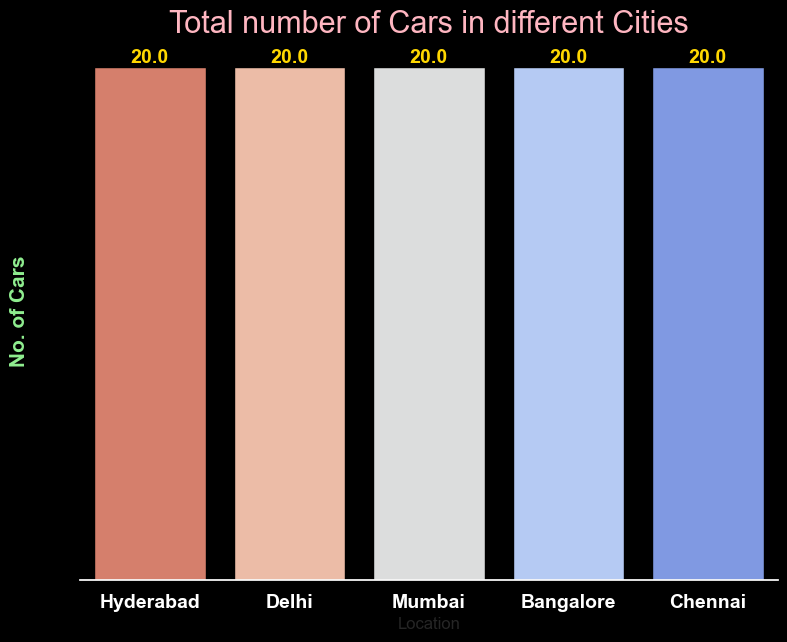

In [ ]:
import matplotlib.pyplot as lt
plt.figure(facecolor='black',figsize=(9,7))
sns.set(rc={'figure.figsize':(8,6)})
a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='coolwarm_r')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='gold',fontweight='bold')
plt.title("Total number of Cars in different Cities",fontsize=22,color='lightpink')
plt.xticks(rotation=0,fontsize=14,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='black')
a.set_facecolor('black')
a.set_ylabel("No. of Cars", fontsize =15, color='lightgreen',fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('white')
a.spines['right'].set_color('black')
plt.grid(False)

In [ ]:
import pandas as pd

df['Model'].fillna('Unknown', inplace=True)
df['Gear'].fillna('Unknown', inplace=True)

print(df[['Model', 'Gear']].isna().sum())


Model    0
Gear     0
dtype: int64


C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\640720719.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model'].fillna('Unknown', inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\640720719.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [ ]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})

C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\3980975188.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Brand Count', data=brand_counts, palette='viridis')


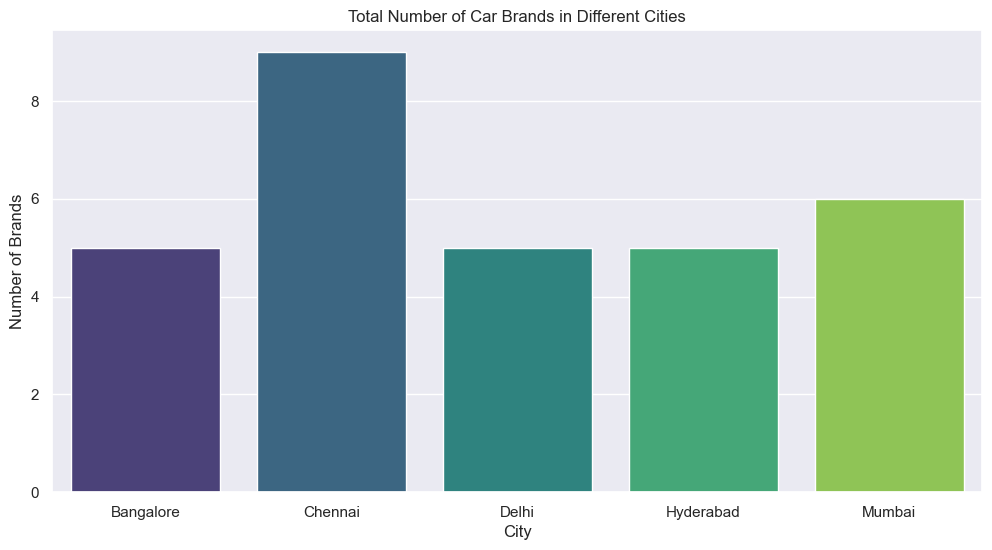

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brand_counts = df.groupby('Location')['Car Brand'].nunique().reset_index().rename(columns={'Car Brand': 'Brand Count'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Brand Count', data=brand_counts, palette='viridis')
plt.title('Total Number of Car Brands in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Brands')
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\2696998207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car Brand', y='Average Price', data=average_price, palette='coolwarm')


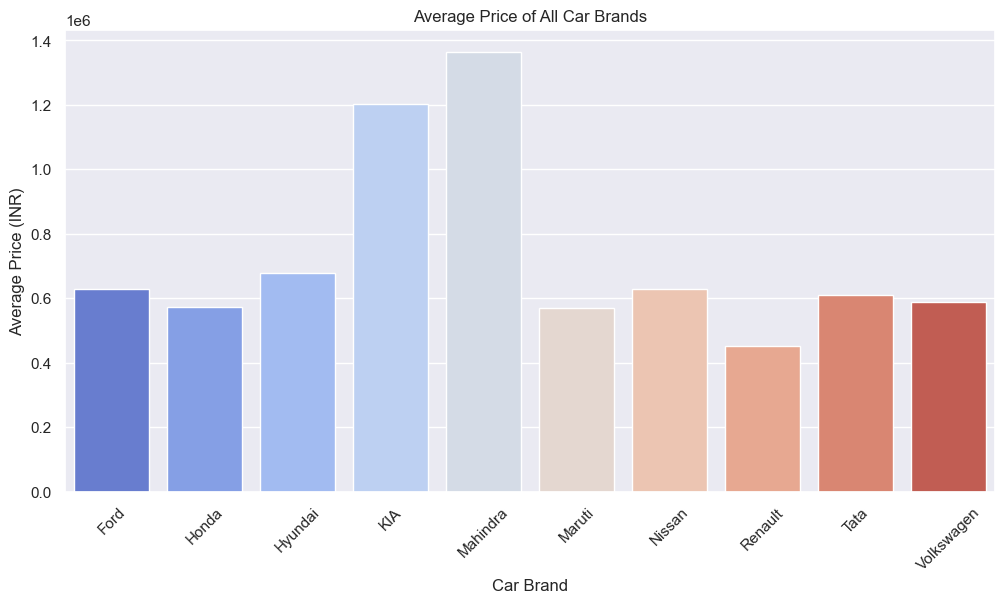

In [ ]:

average_price = df.groupby('Car Brand')['Price'].mean().reset_index().rename(columns={'Price': 'Average Price'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Car Brand', y='Average Price', data=average_price, palette='coolwarm')
plt.title('Average Price of All Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\2072702800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Brand Count', data=brand_counts_cities, palette='plasma')


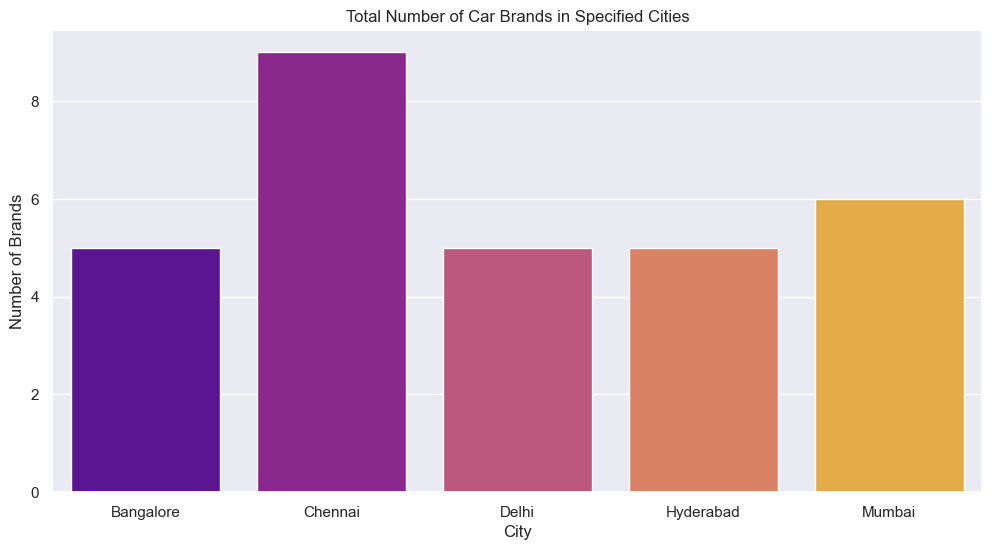

In [ ]:

cities = ['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai']
filtered_df = df[df['Location'].isin(cities)]

brand_counts_cities = filtered_df.groupby('Location')['Car Brand'].nunique().reset_index().rename(columns={'Car Brand': 'Brand Count'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Brand Count', data=brand_counts_cities, palette='plasma')
plt.title('Total Number of Car Brands in Specified Cities')
plt.xlabel('City')
plt.ylabel('Number of Brands')
plt.show()


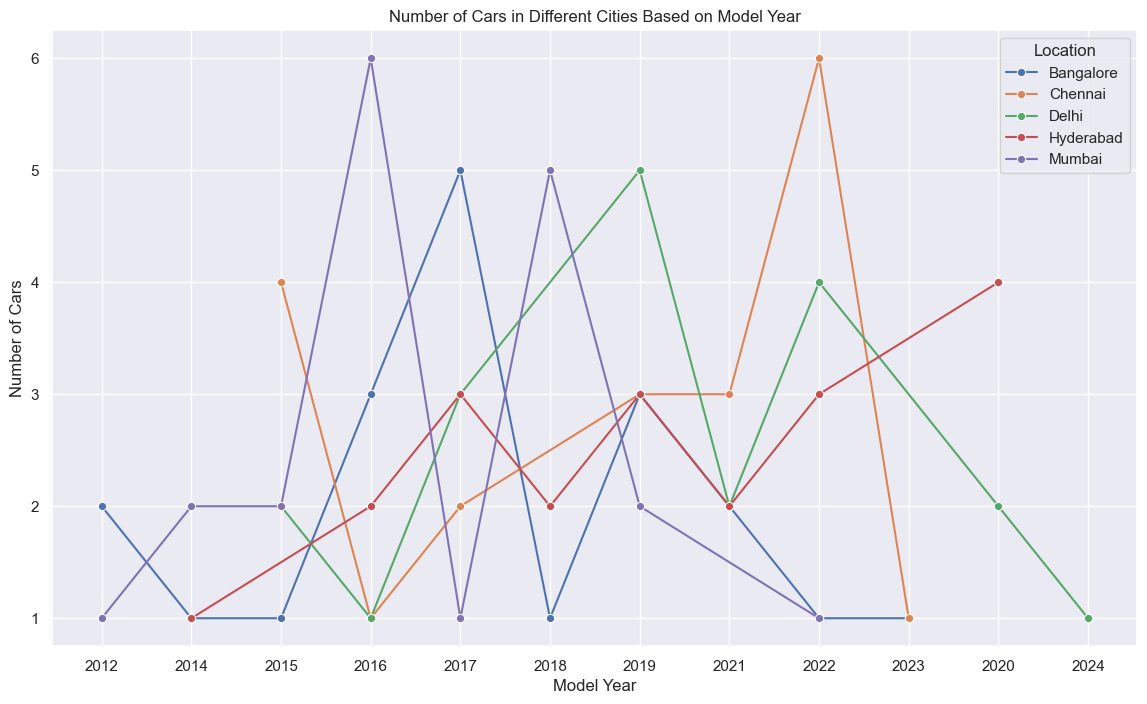

In [ ]:

model_year_city_counts = df.groupby(['Location', 'Model Year']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Model Year', y='Count', hue='Location', data=model_year_city_counts, marker='o')
plt.title('Number of Cars in Different Cities Based on Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.show()


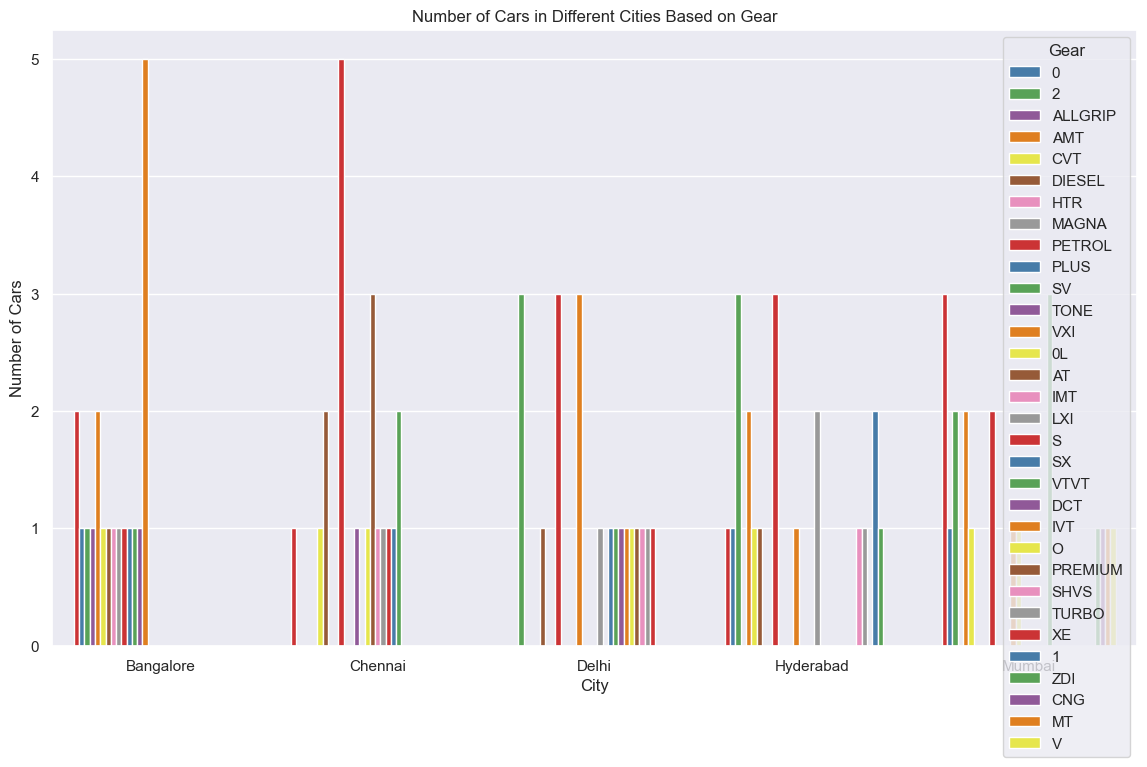

In [ ]:
gear_city_counts = df.groupby(['Location', 'Gear']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Location', y='Count', hue='Gear', data=gear_city_counts, palette='Set1')
plt.title('Number of Cars in Different Cities Based on Gear')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.show()


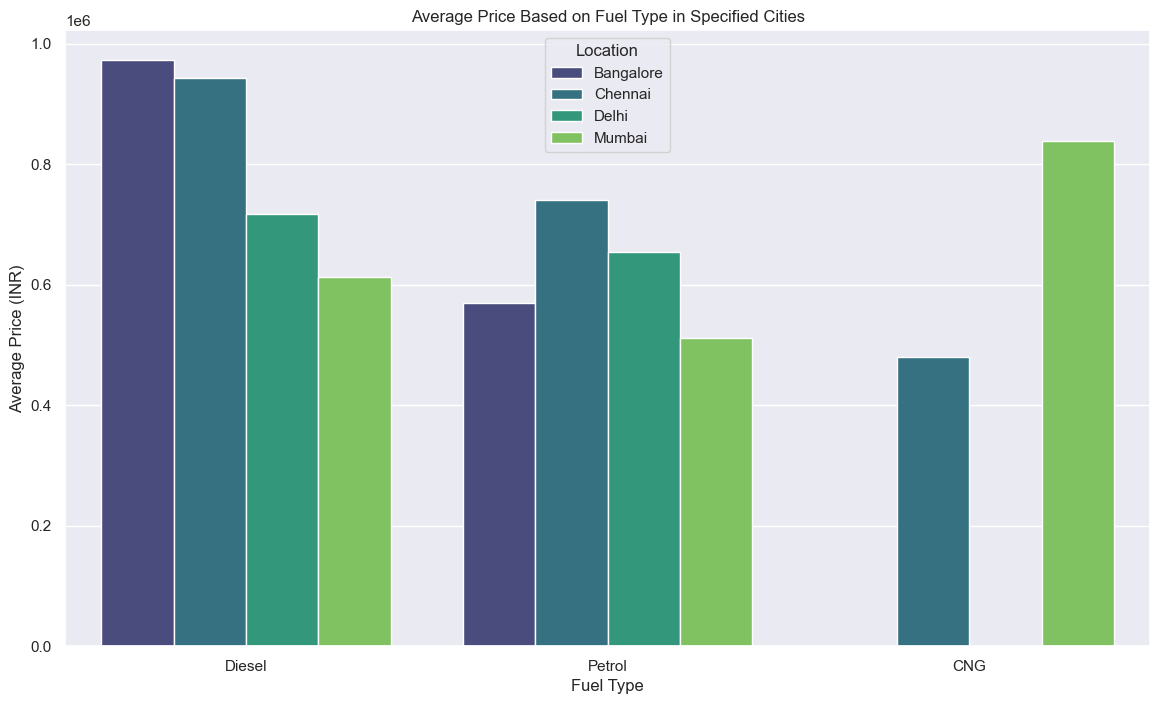

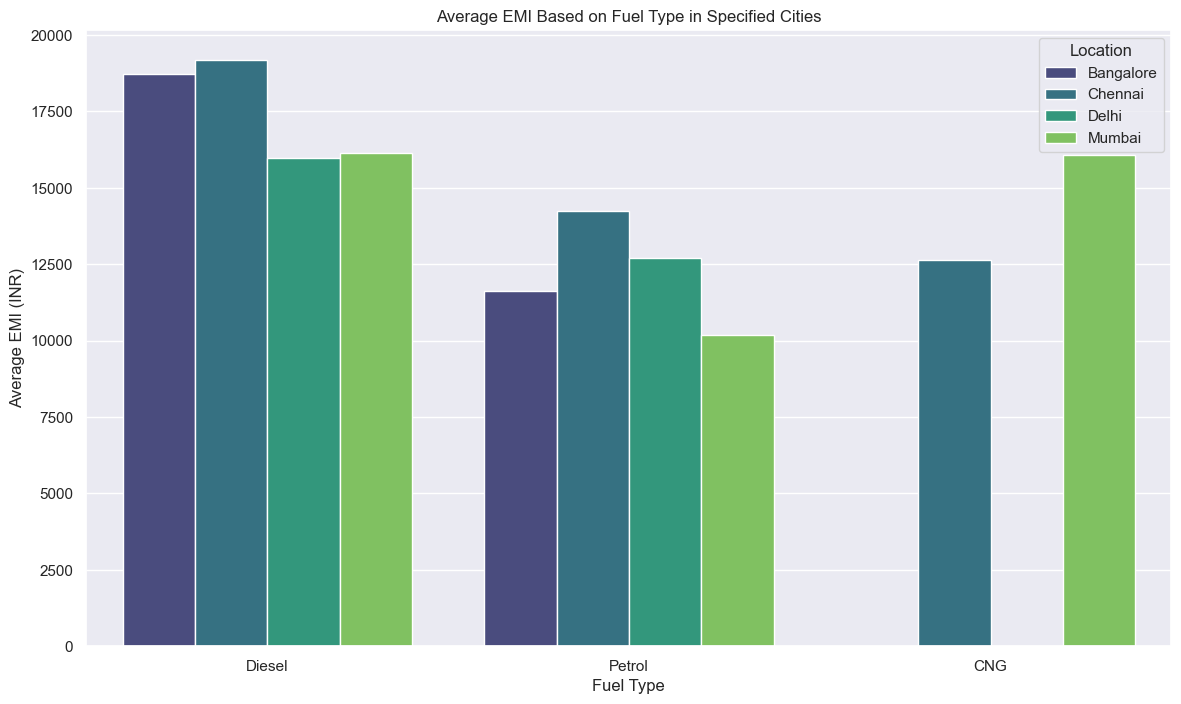

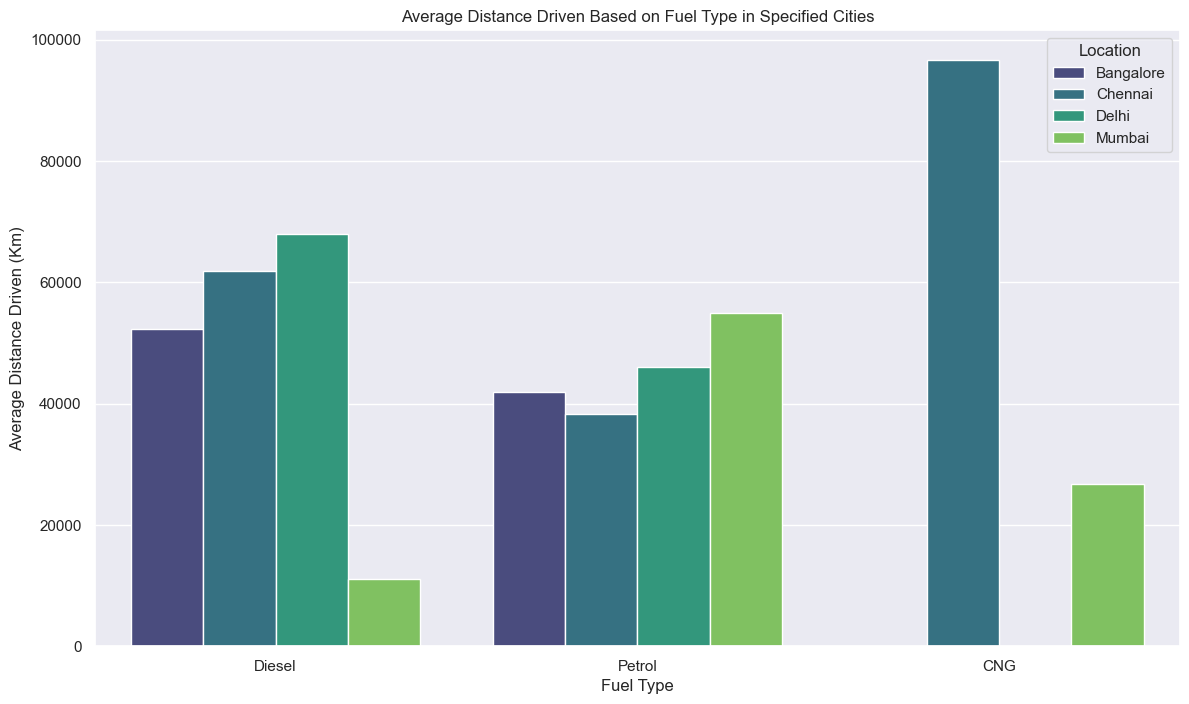

In [ ]:

cities = ['Bangalore', 'Chennai', 'Mumbai', 'Delhi']
filtered_df = df[df['Location'].isin(cities)]

stats_by_fuel = filtered_df.groupby(['Location', 'Fuel Type']).agg({'Price': 'mean', 'EMI': 'mean', 'Distance Driven': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Fuel Type', y='Price', hue='Location', data=stats_by_fuel, palette='viridis')
plt.title('Average Price Based on Fuel Type in Specified Cities')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (INR)')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Fuel Type', y='EMI', hue='Location', data=stats_by_fuel, palette='viridis')
plt.title('Average EMI Based on Fuel Type in Specified Cities')
plt.xlabel('Fuel Type')
plt.ylabel('Average EMI (INR)')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Fuel Type', y='Distance Driven', hue='Location', data=stats_by_fuel, palette='viridis')
plt.title('Average Distance Driven Based on Fuel Type in Specified Cities')
plt.xlabel('Fuel Type')
plt.ylabel('Average Distance Driven (Km)')
plt.show()


In [ ]:

cities = ['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai']
filtered_df = df[df['Location'].isin(cities)]

max_price_cars = filtered_df.loc[filtered_df.groupby('Location')['Price'].idxmax()].reset_index(drop=True)
min_price_cars = filtered_df.loc[filtered_df.groupby('Location')['Price'].idxmin()].reset_index(drop=True)


print("Car with the highest price in specified cities:")
print(max_price_cars[['Location', 'Car Name', 'Price']])

print("\nCar with the lowest price in specified cities:")
print(min_price_cars[['Location', 'Car Name', 'Price']])


Car with the highest price in specified cities:
    Location                                           Car Name      Price
0  Bangalore  2022 Maruti Grand Vitara ALPHA SMART HYBRID AL...  1616000.0
1    Chennai             2022 Mahindra Thar LX PETROL HT 4WD AT  1496000.0
2      Delhi            2022 Hyundai Creta SX (O) 1.4 TURBO DCT  1654000.0
3  Hyderabad                2020 KIA SELTOS HTX PLUS 1.5 DIESEL  1324000.0
4     Mumbai                     2022 Maruti Ertiga ZXI (O) CNG  1192000.0

Car with the lowest price in specified cities:
    Location                     Car Name     Price
0  Bangalore     2012 Maruti Alto K10 VXI  264000.0
1    Chennai         2019 Maruti Alto LXI  332000.0
2      Delhi     2016 Maruti Alto 800 LXI  231000.0
3  Hyderabad         2020 Maruti Alto LXI  306000.0
4     Mumbai  2012 Maruti Wagon R 1.0 VXI  231000.0


C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\3668767101.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)
C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\3668767101.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)


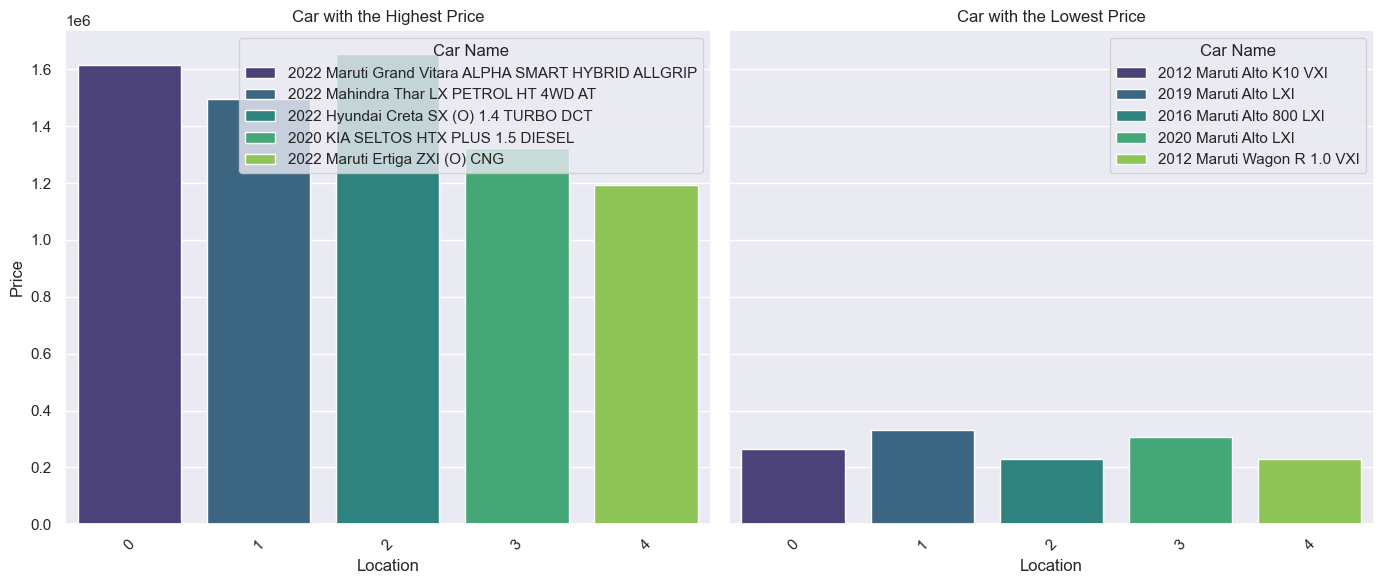

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(ax=axes[0], x='Location', y='Price', hue='Car Name', data=max_price_cars, palette='viridis')
axes[0].set_title('Car with the Highest Price')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)


sns.barplot(ax=axes[1], x='Location', y='Price', hue='Car Name', data=min_price_cars, palette='viridis')
axes[1].set_title('Car with the Lowest Price')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation=45)

plt.tight_layout()
plt.show()

<Figure size 2400x1700 with 0 Axes>

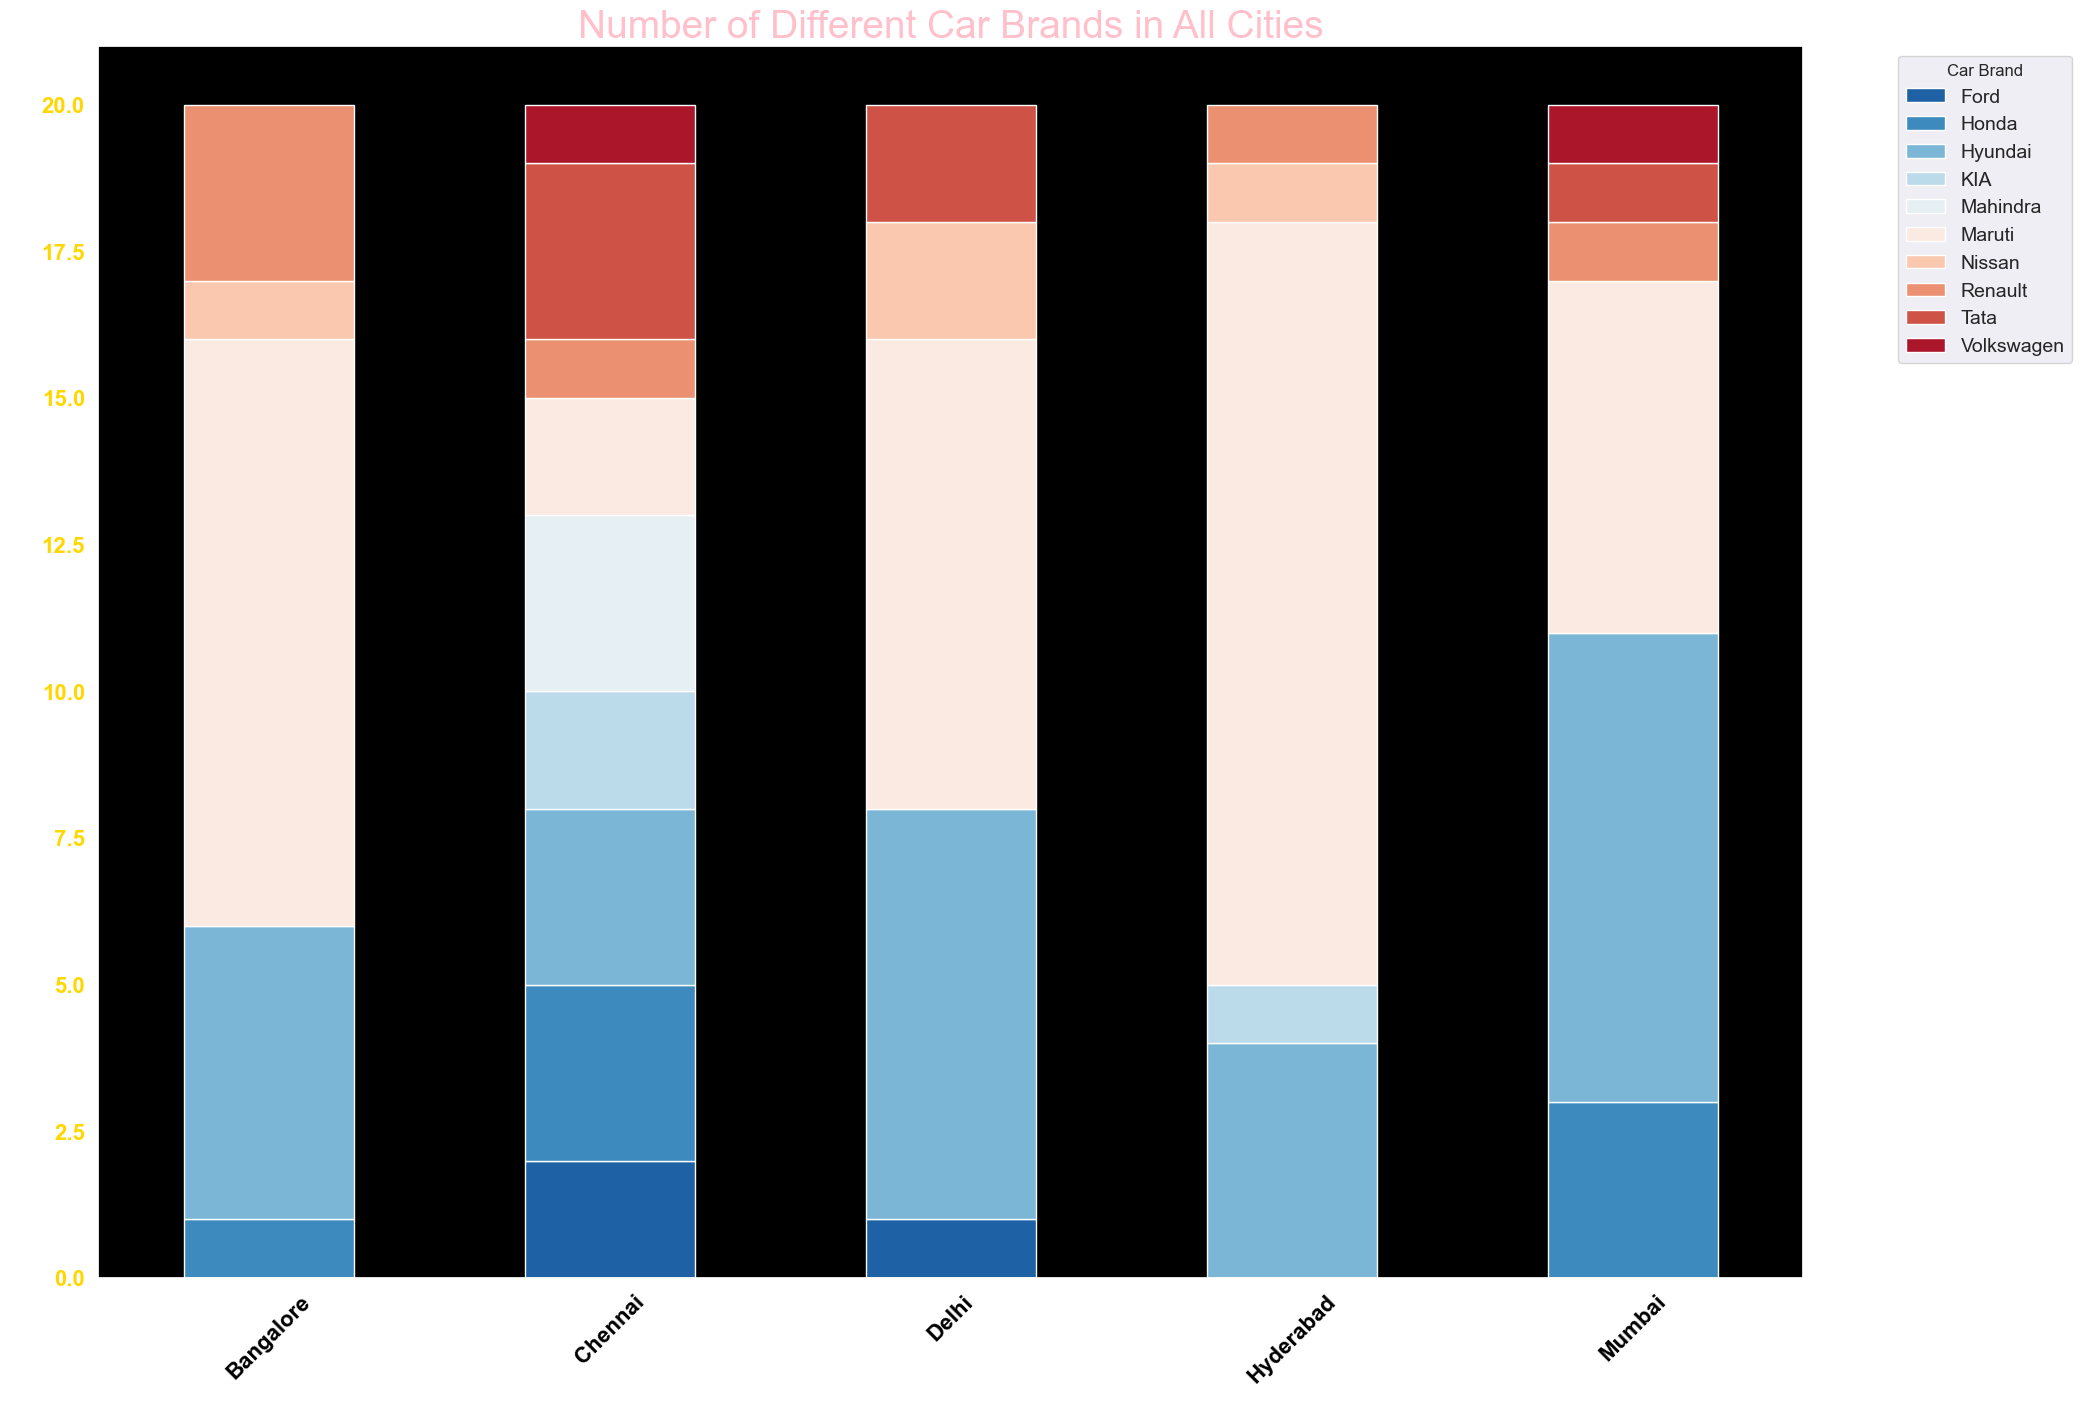

In [ ]:



brand_city_counts = df.groupby(['Location', 'Car Brand']).size().unstack().fillna(0)

plt.figure(facecolor='black', figsize=(24, 17))
sns.set(rc={'figure.figsize': (22, 16)})
brand_city_counts.plot(kind='bar', stacked=True, figsize=(22, 16), color=sns.color_palette('RdBu_r', n_colors=len(brand_city_counts.columns)))
plt.xticks(rotation=45, fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='gold')
plt.title('Number of Different Car Brands in All Cities', fontsize=28, color='pink')
plt.ylabel('Number of Cars', fontsize=20, color='white')
plt.xlabel('Cities', fontsize=20, color='white')
plt.legend(title='Car Brand', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.gca().set_facecolor('black')
plt.grid(False)
plt.show()



C:\Users\vinay\AppData\Local\Temp\ipykernel_3328\3096835687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='Car Brand', x='Avg Price', data=average_price_brands, palette='RdBu_r', edgecolor='none')


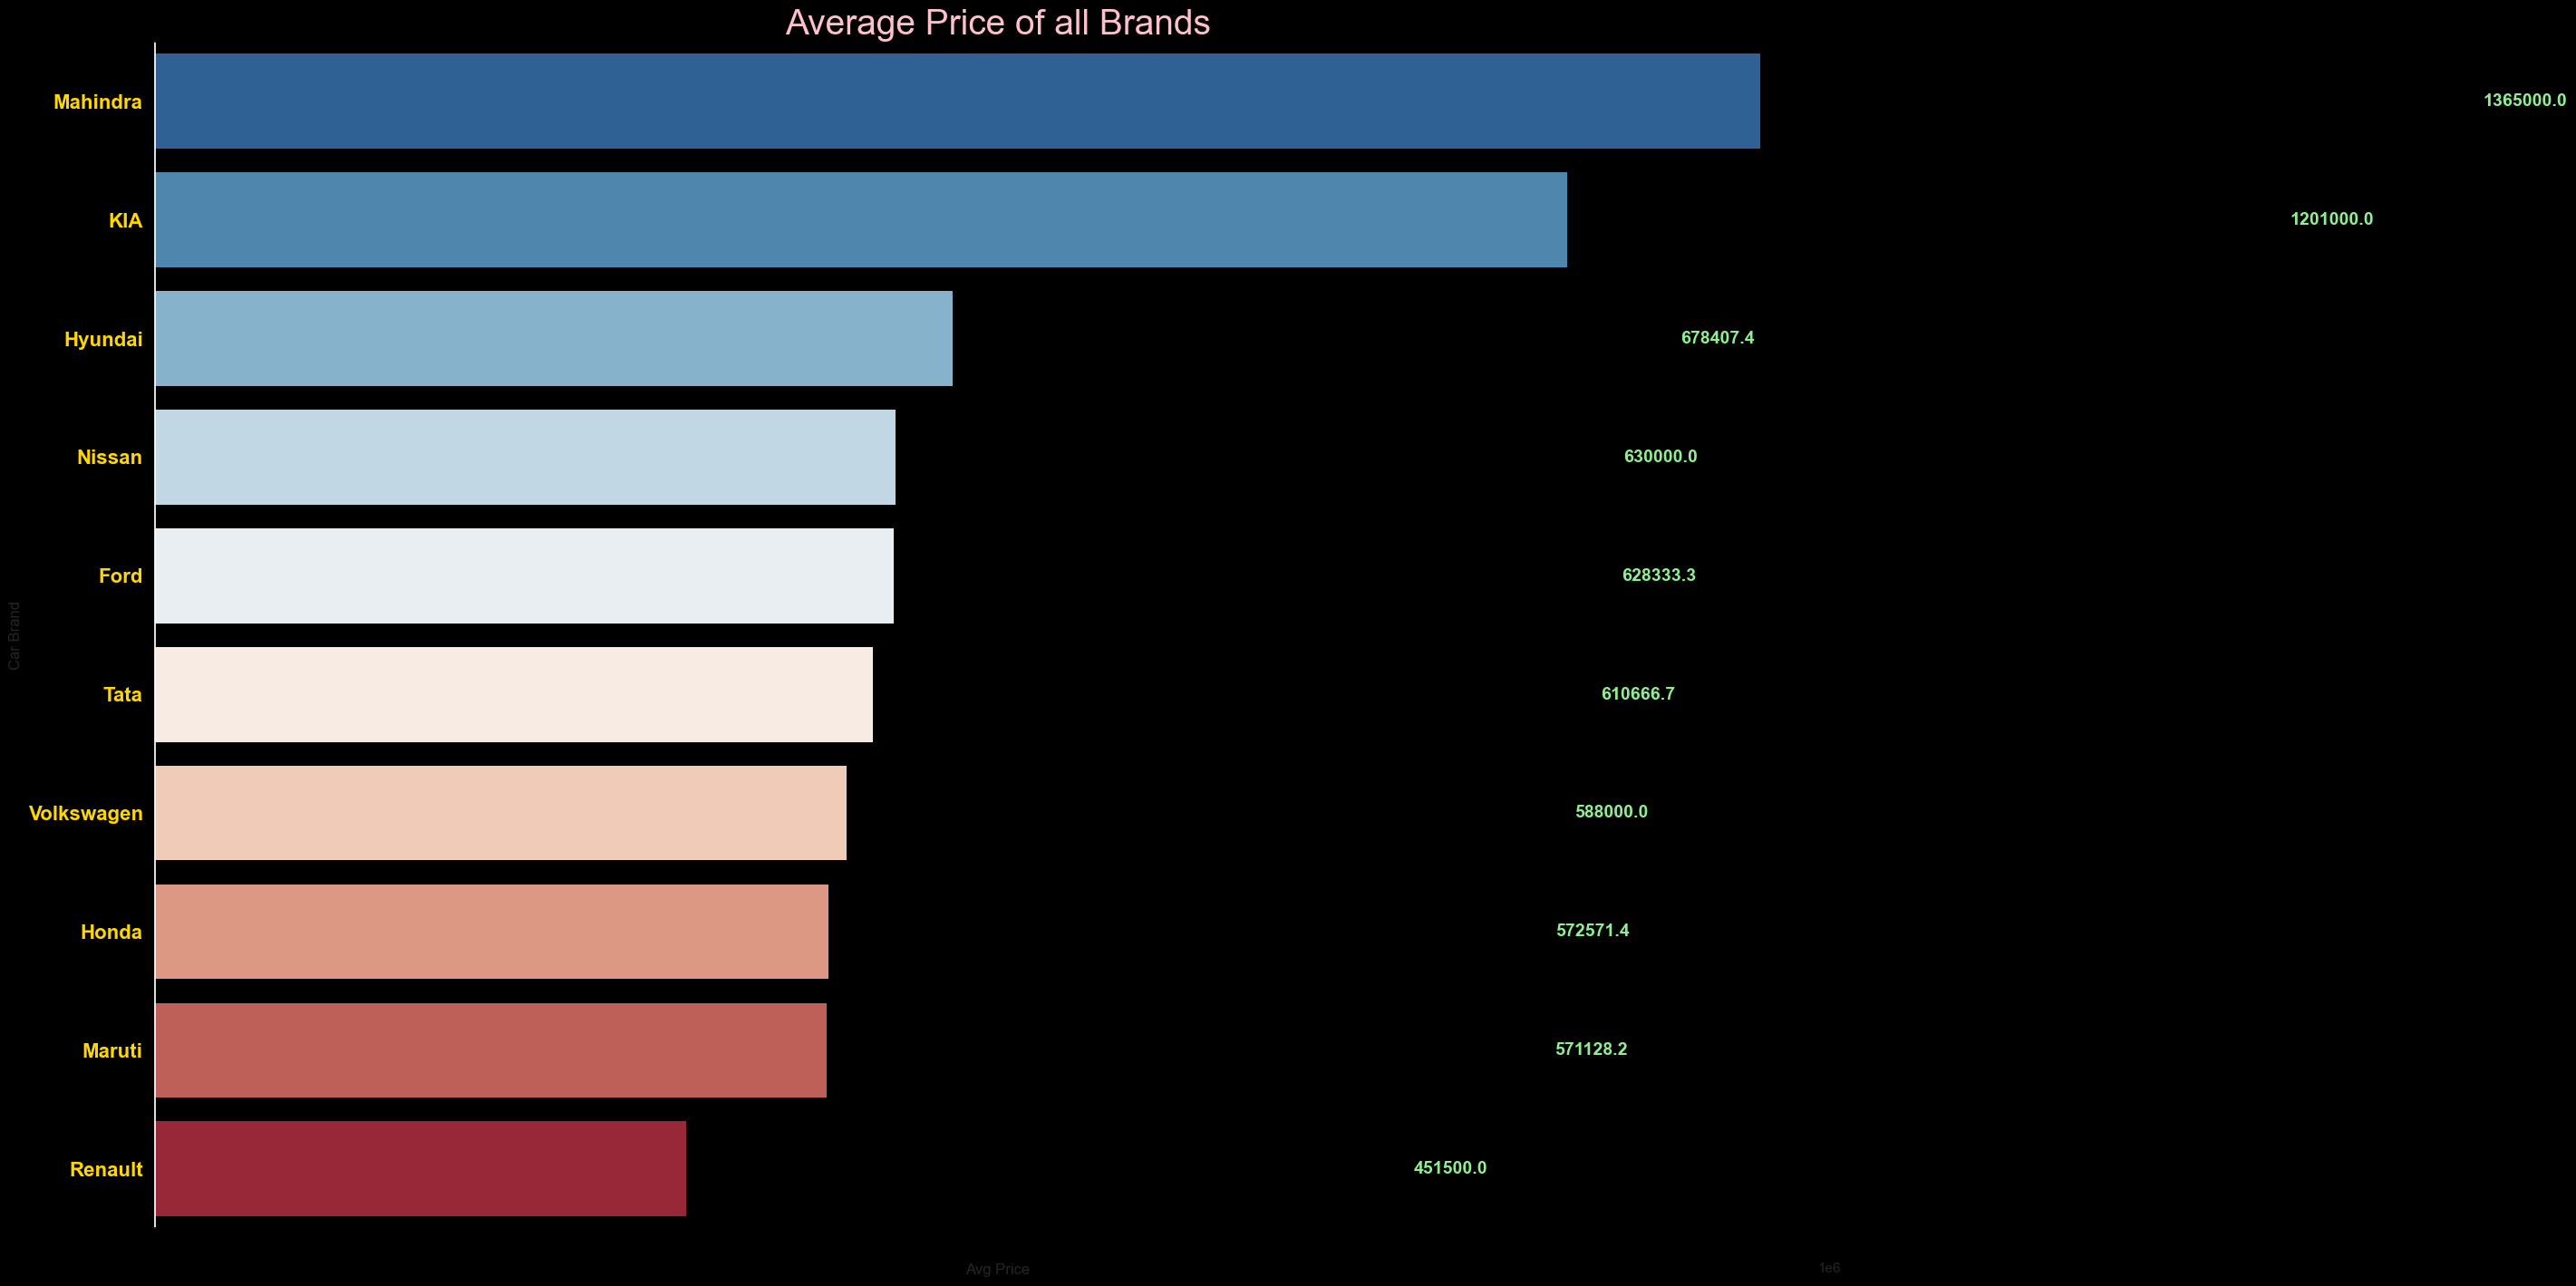

In [ ]:

average_price_brands = df.groupby('Car Brand')['Price'].mean().reset_index().rename(columns={'Price': 'Avg Price'})

average_price_brands = average_price_brands.sort_values(by='Avg Price', ascending=False)

plt.figure(facecolor='black', figsize=(24, 17))
sns.set(rc={'figure.figsize': (22, 16)})
a = sns.barplot(y='Car Brand', x='Avg Price', data=average_price_brands, palette='RdBu_r', edgecolor='none')
plt.xticks(rotation=0, fontsize=16, fontweight='bold', color='black')
plt.yticks(fontsize=16, fontweight='bold', color='gold')
for p in a.patches:
    width = p.get_width()
    plt.text(650000 + p.get_width(), p.get_y() + 0.55 * p.get_height(),
             '{:1.1f}'.format(width), ha='center', fontsize=14, fontweight='bold', color='lightgreen')
plt.title("Average Price of all Brands", fontsize=28, color='pink')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)
plt.show()



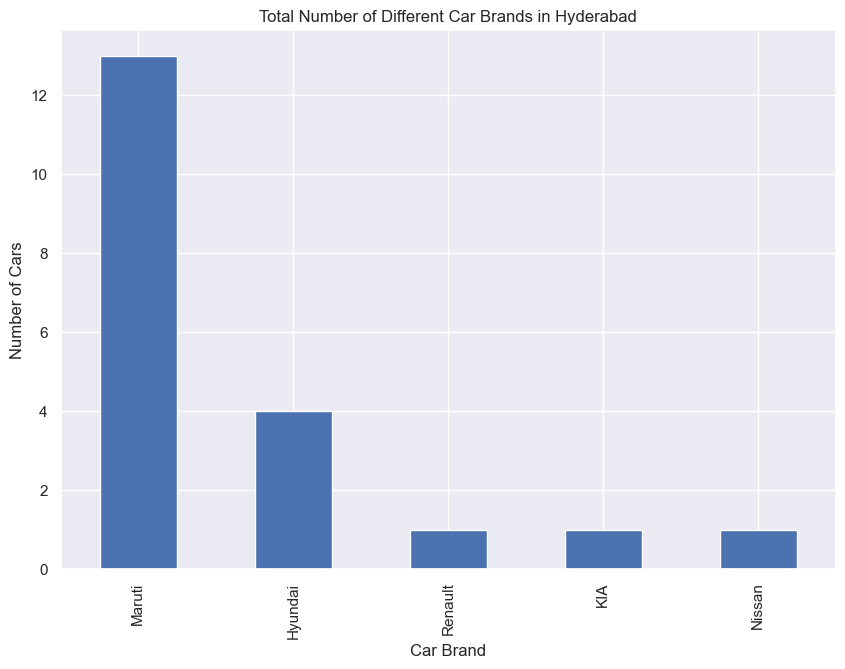

In [ ]:

brands_hyderabad = df[df['Location'] == 'Hyderabad']['Car Brand'].value_counts()

brands_hyderabad.plot(kind='bar', figsize=(10, 7))
plt.title('Total Number of Different Car Brands in Hyderabad')
plt.ylabel('Number of Cars')
plt.xlabel('Car Brand')
plt.show()


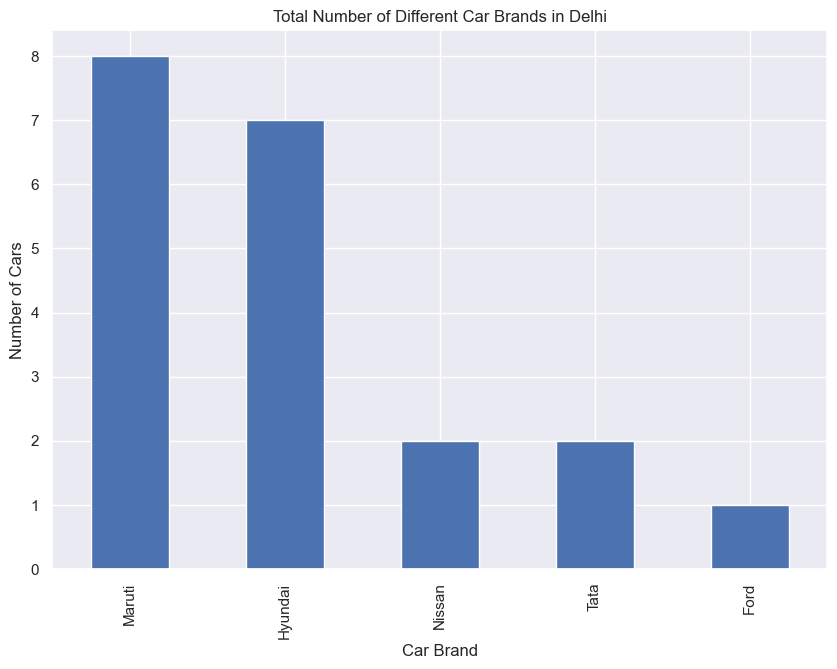

In [ ]:
brands_hyderabad = df[df['Location'] == 'Delhi']['Car Brand'].value_counts()

brands_hyderabad.plot(kind='bar', figsize=(10, 7))
plt.title('Total Number of Different Car Brands in Delhi')
plt.ylabel('Number of Cars')
plt.xlabel('Car Brand')
plt.show()


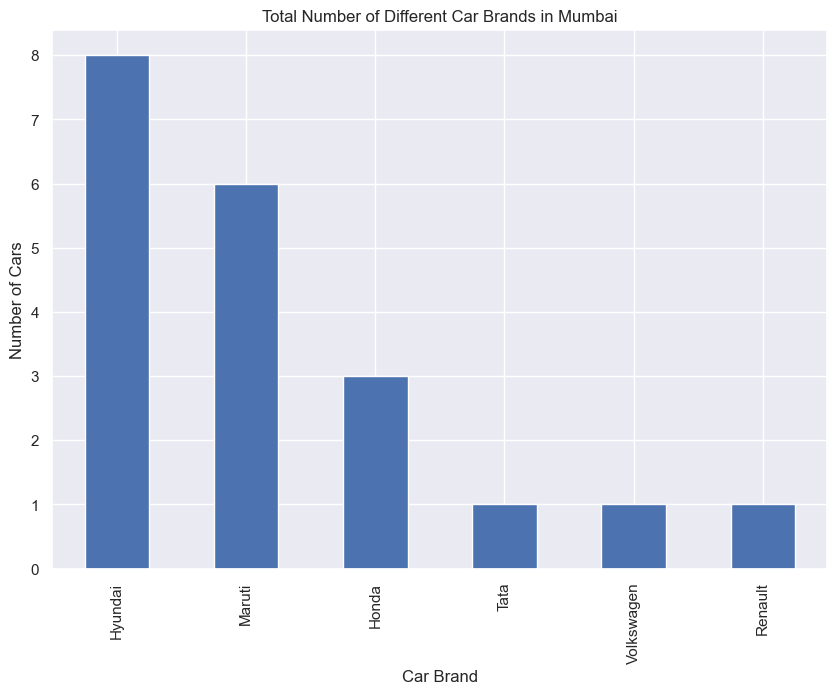

In [ ]:
brands_hyderabad = df[df['Location'] == 'Mumbai']['Car Brand'].value_counts()

brands_hyderabad.plot(kind='bar', figsize=(10, 7))
plt.title('Total Number of Different Car Brands in Mumbai')
plt.ylabel('Number of Cars')
plt.xlabel('Car Brand')
plt.show()